In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
data=pd.read_csv('Suicide.csv')
data.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [75]:
data.shape

(27820, 12)

In [76]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [77]:
data['HDI for year']=data['HDI for year'].interpolate()
data['HDI for year']=data['HDI for year'].fillna(method='bfill')

In [81]:
group_gender=data.groupby(['sex'])[['suicides_no']].sum().reset_index()
group_gender

,sex,suicides_no
0,female,1559510
1,male,5188910


In [79]:
data['sex'].value_counts()

female    13910
male      13910
Name: sex, dtype: int64

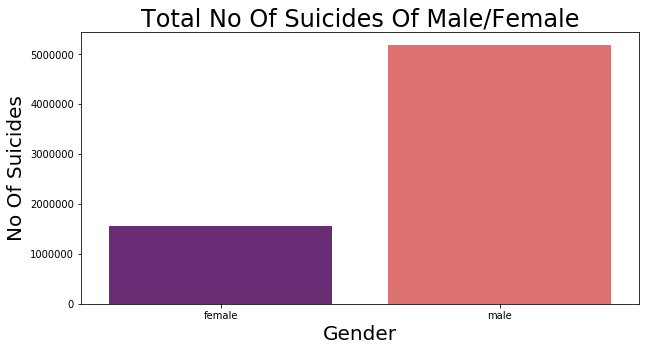

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x='sex',y='suicides_no',data=group_gender,palette='magma')
plt.xlabel('Gender',fontsize=20)
plt.ylabel('No Of Suicides',fontsize=20)
plt.title('Total No Of Suicides Of Male/Female',fontsize=24)
plt.show()

In [83]:
a=data.groupby(['country','sex'])[['suicides_no']].sum().reset_index()
a.head(14)

,country,sex,suicides_no
0,Albania,female,693
1,Albania,male,1277
2,Antigua and Barbuda,female,1
3,Antigua and Barbuda,male,10
4,Argentina,female,18326
5,Argentina,male,63893
6,Armenia,female,495
7,Armenia,male,1410
8,Aruba,female,17
9,Aruba,male,84


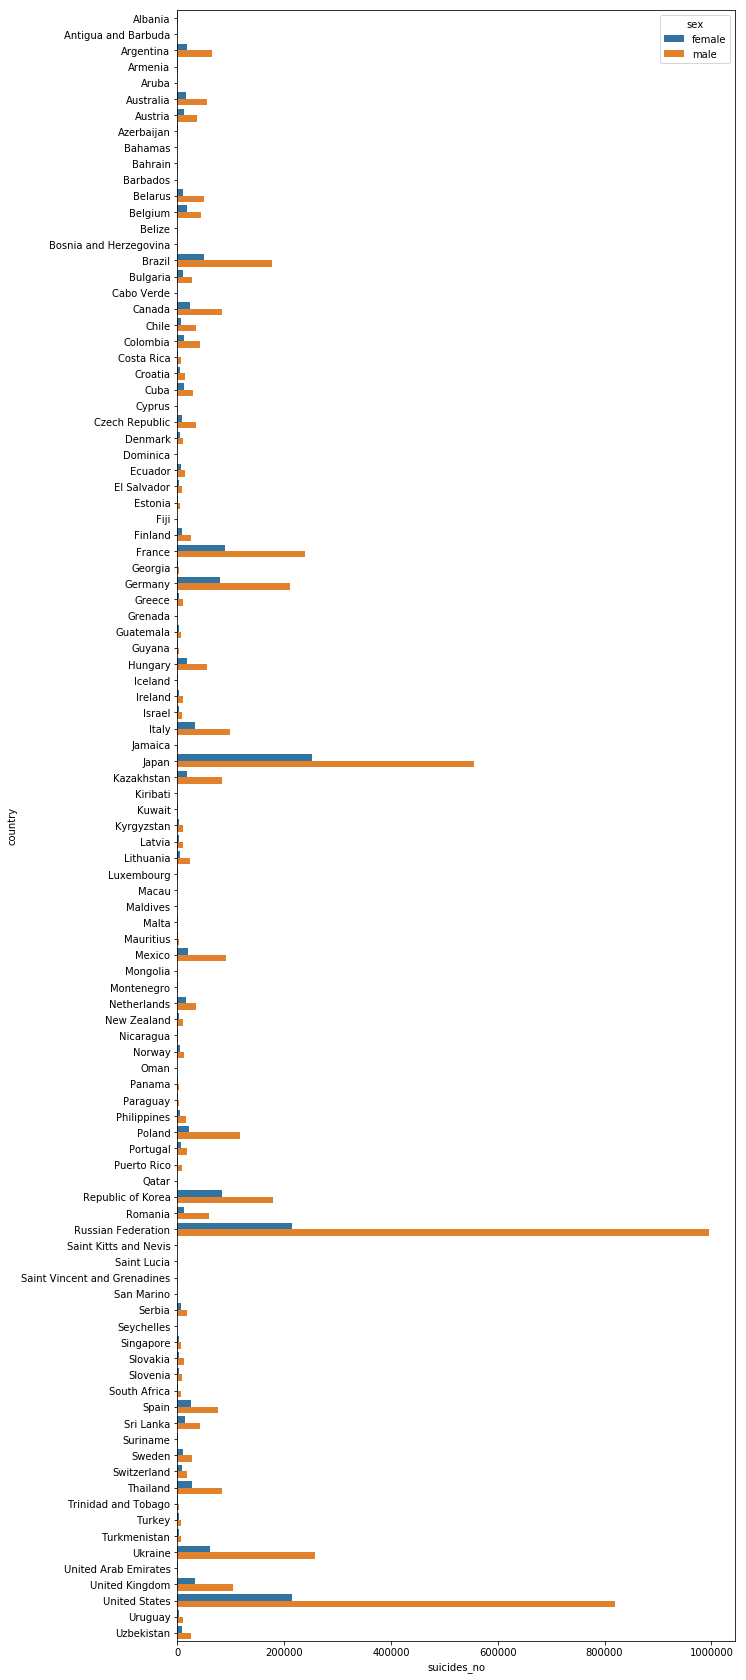

In [11]:
plt.figure(figsize=(10,30))
sns.barplot(a['suicides_no'],a['country'],hue='sex',data=a)


In [85]:
all_suicides=data.groupby(['country'])[['suicides_no']].sum().reset_index()
all_suicides.head()

,country,suicides_no
0,Albania,1970
1,Antigua and Barbuda,11
2,Argentina,82219
3,Armenia,1905
4,Aruba,101


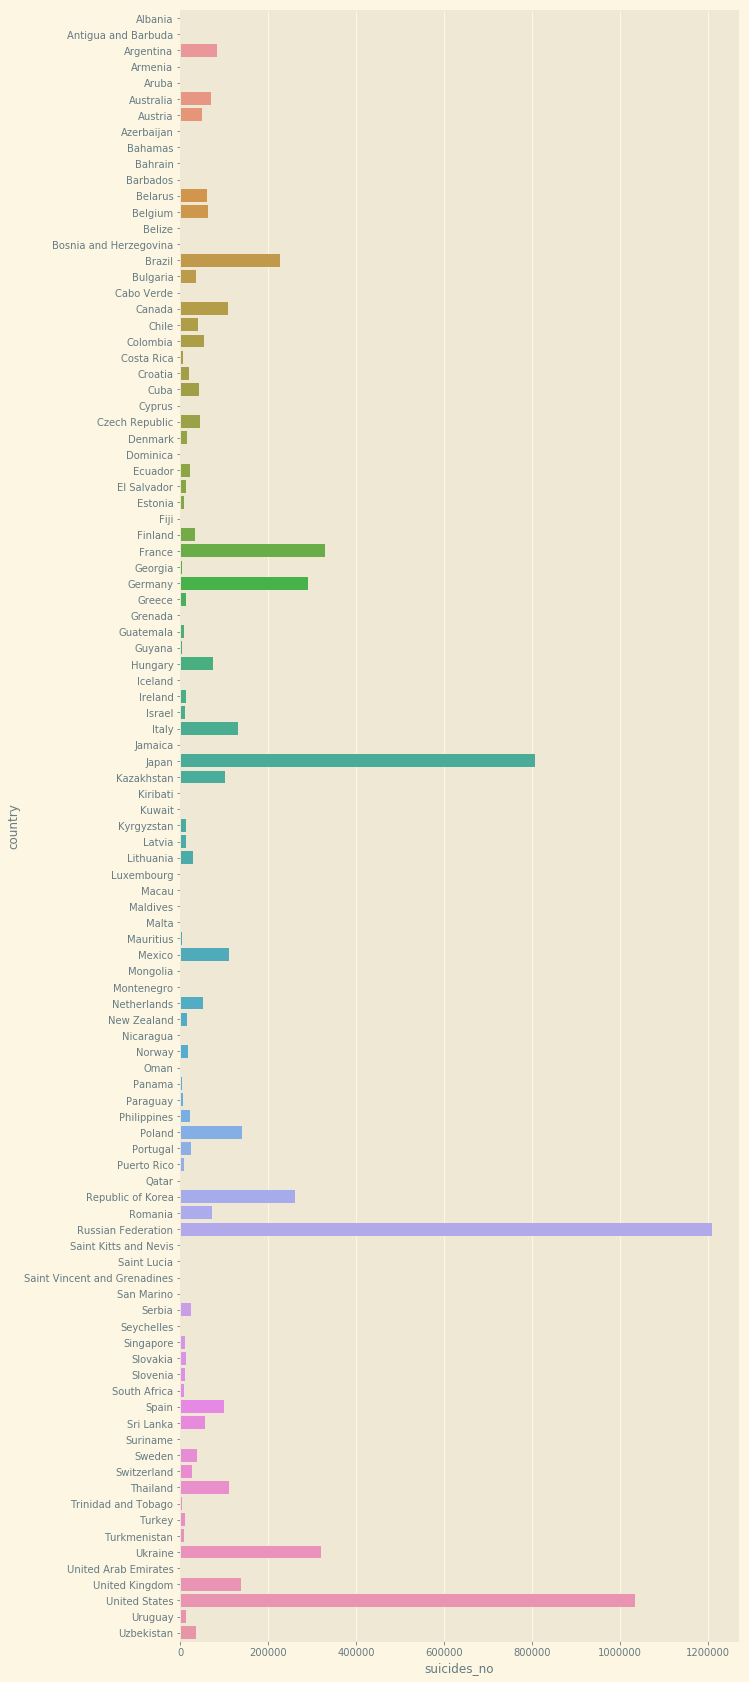

In [86]:
plt.figure(figsize=(10,30))
sns.barplot(y=all_suicides['country'],x=all_suicides['suicides_no'])

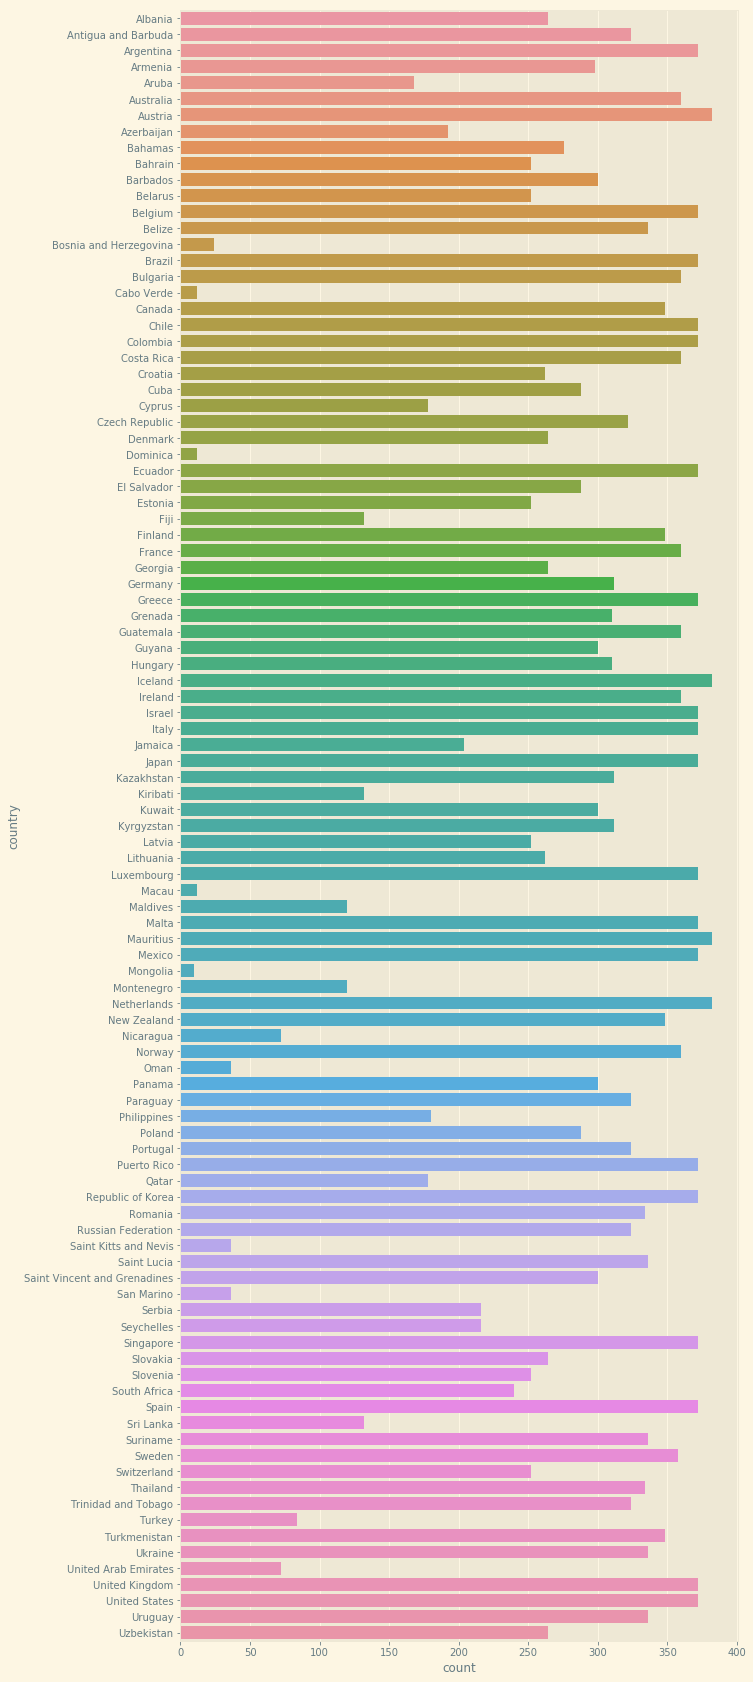

In [87]:
plt.figure(figsize=(10,30))
sns.countplot(y=data['country'])

In [88]:
data.country.value_counts()

Netherlands               382
Mauritius                 382
Iceland                   382
Austria                   382
Republic of Korea         372
                         ... 
Bosnia and Herzegovina     24
Macau                      12
Cabo Verde                 12
Dominica                   12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [92]:
group_age=data.groupby(['age'])[['suicides_no']].sum().reset_index()
group_age

,age,suicides_no
0,15-24 years,808542
1,25-34 years,1123912
2,35-54 years,2452141
3,5-14 years,52264
4,55-74 years,1658443
5,75+ years,653118


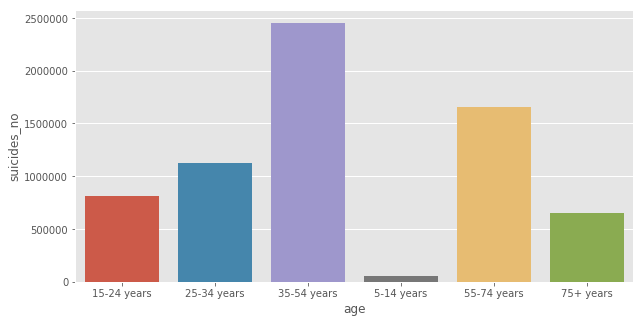

In [93]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.barplot(group_age['age'],group_age['suicides_no'])

#### So the ratio of people aged between 35-54 commits most suicide 

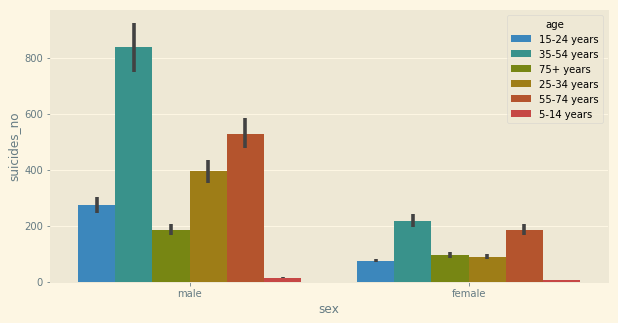

In [94]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(10,5))
sns.barplot(data['sex'],data['suicides_no'],hue='age',data=data)

In [95]:
age_population=data.groupby('age')[['population']].sum().reset_index()
age_population

,age,population
0,15-24 years,8642946896
1,25-34 years,8438103587
2,35-54 years,14375888123
3,5-14 years,8398693237
4,55-74 years,8803245340
5,75+ years,2663281253


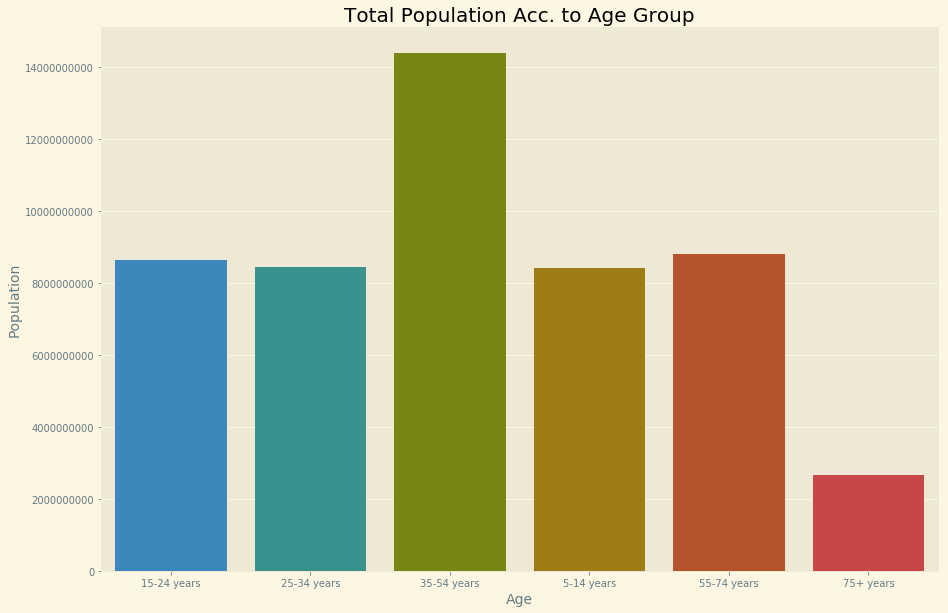

In [96]:
import matplotlib.ticker as pt
plt.figure(figsize=(15,10))
ax=sns.barplot(age_population['age'],age_population['population'])
ax.yaxis.set_major_formatter(pt.FormatStrFormatter("%.f"))
plt.title('Total Population Acc. to Age Group',fontsize=20)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Population',fontsize=14)
plt.show()

In [97]:
albania_data=data[data['country']=='Albania'][['country','year','sex','age','suicides_no']]

In [98]:
albania_data.head()

,country,year,sex,age,suicides_no
0,Albania,1987,male,15-24 years,21
1,Albania,1987,male,35-54 years,16
2,Albania,1987,female,15-24 years,14
3,Albania,1987,male,75+ years,1
4,Albania,1987,male,25-34 years,9


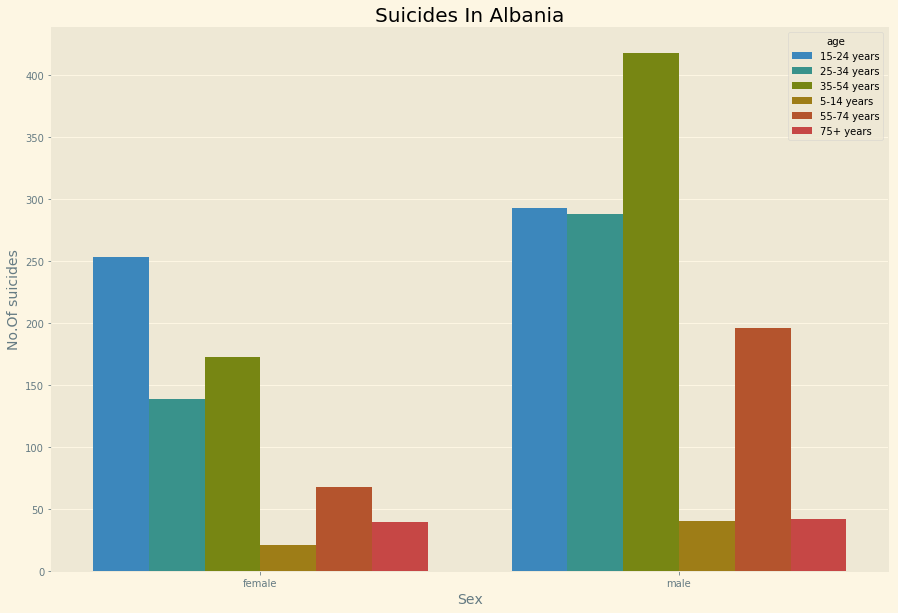

In [99]:
plt.figure(figsize=(15,10))
albania_data=albania_data.groupby(['sex','age'])[['suicides_no']].sum().reset_index()
sns.barplot(albania_data['sex'],albania_data['suicides_no'],data=albania_data,hue='age')
plt.title('Suicides In Albania',fontsize=20)
plt.xlabel('Sex',fontsize=14)
plt.ylabel('No.Of suicides',fontsize=14)
plt.show()

In [21]:
data_1985=data[data['year']==1985][['year','country','suicides_no']].groupby(['country','year']).sum().reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

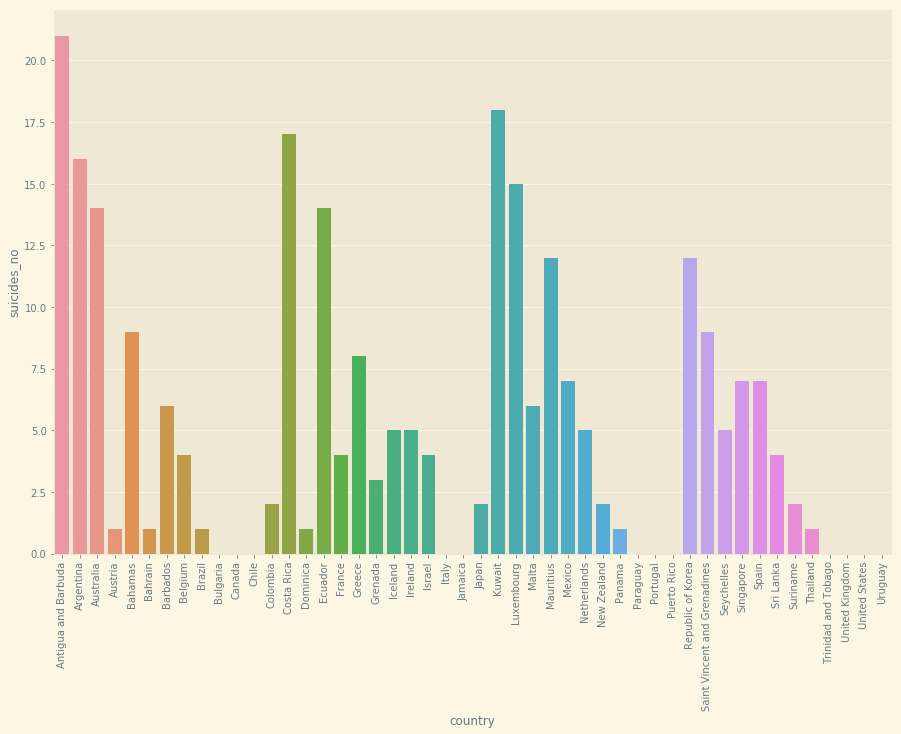

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(data_1985['country'],data['suicides_no'])
plt.xticks(rotation=90)

In [115]:
sns.catplot('sex','suicides_no',hue='age',col='gdp_year',data=data,kind='bar',col_wrap=3)


ValueError: Image size of 1080x278640 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1080x278640 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x278640 with 2321 Axes>

In [113]:
data.rename(columns={' gdp_for_year ($) ':'gdp_year'},inplace=True)

In [25]:
data.gdp_year = data.gdp_year.str.replace(',', '').astype(float).astype('Int64')

In [26]:
data.gdp_year

0         2156624900
1         2156624900
2         2156624900
3         2156624900
4         2156624900
            ...     
27815    63067077179
27816    63067077179
27817    63067077179
27818    63067077179
27819    63067077179
Name: gdp_year, Length: 27820, dtype: Int64

In [54]:
gdp=data.groupby(['country','sex'])[['gdp_year']].mean().reset_index()
gdp.tail()

,country,sex,gdp_year
197,United States,male,1.051071e+13
198,Uruguay,female,2.337827e+10
199,Uruguay,male,2.337827e+10
200,Uzbekistan,female,2.286003e+10
201,Uzbekistan,male,2.286003e+10


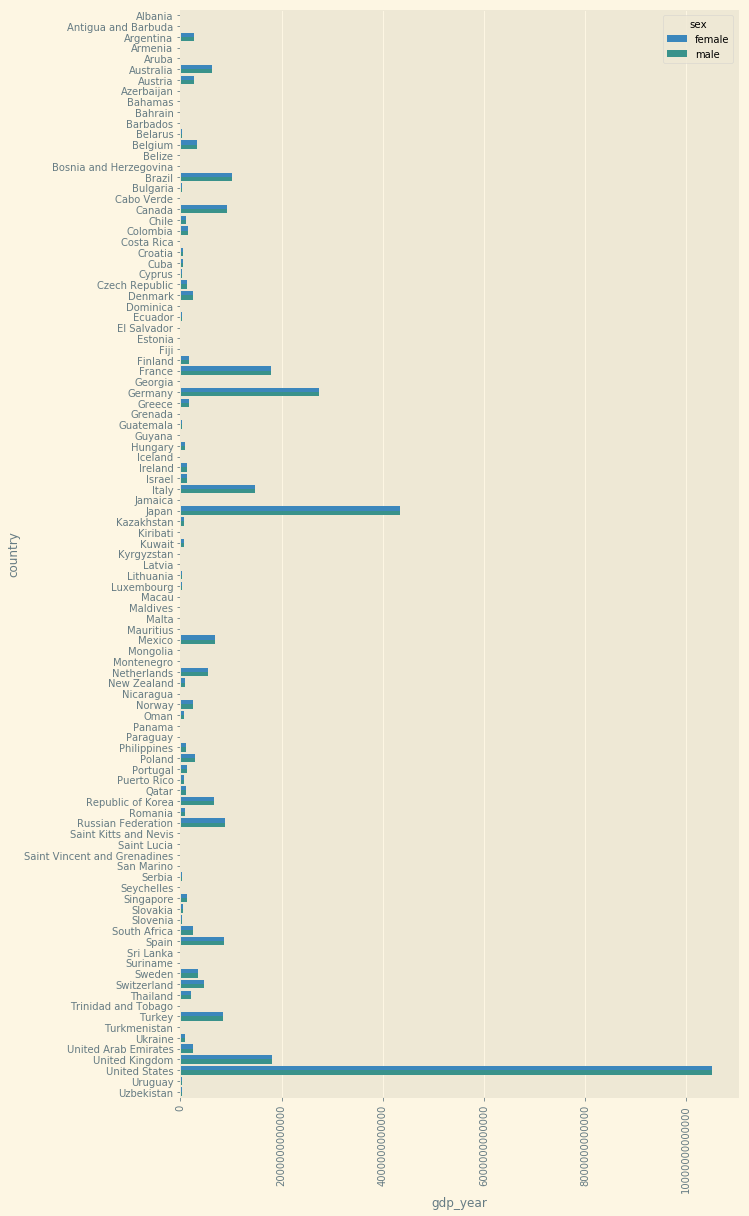

In [108]:
plt.figure(figsize=(10,20))
ax=sns.barplot(y=gdp['country'],x=gdp['gdp_year'],hue='sex',data=gdp)
ax.xaxis.set_major_formatter(pt.FormatStrFormatter("%.f"))
plt.xticks(rotation=90)
plt.show()

In [114]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.619,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.619,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.619,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.619,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.619,"2,156,624,900",796,Boomers
